# Estatística Descritiva

## 1) Análise dos Dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
df_titanic = pd.read_csv('/content/Titanic_data.csv')

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


O conjunto de treinamento tem 891 exemplos e 11 características + a variável de destino (Survived) . 2 dos recursos são floats, 5 são inteiros e 5 são objetos. Abaixo listei os recursos com uma breve descrição:

* survival: Sobrevivente
* PassengerId: ID único de um passageiro
* Pclass: Classe de bilhetes
* Sex: Sexo
* Age: Idade em anos
* Sibsp: Número de irmãos / cônjuges a bordo do Titanic
* Parch: Número de pais / filhos a bordo do Titanic
* Ticket: Numero do bilhete
* Fare: Tarifa de passageiros
* Cabin: Número de cabine
* Embarked: Porto de embarcação

In [ ]:
df_titanic[df_titanic['Sex']=='male'].Sex.count()

577

In [ ]:
df_titanic[df_titanic['Sex']=='female'].Sex.count()

314

<BarContainer object of 2 artists>

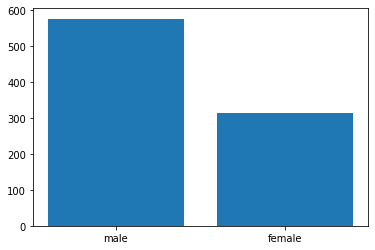

In [ ]:
plt.bar(['male','female'],[df_titanic[df_titanic['Sex']=='male'].Sex.count(),df_titanic[df_titanic['Sex']=='female'].Sex.count()])

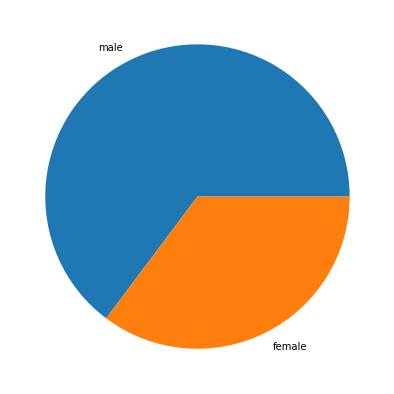

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.pie([df_titanic[df_titanic['Sex']=='male'].Sex.count(),df_titanic[df_titanic['Sex']=='female'].Sex.count()],labels=['male','female'])
plt.show()

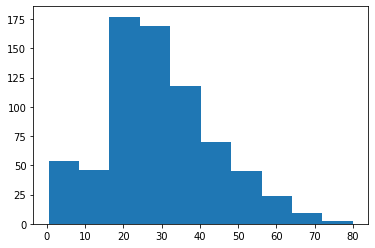

In [ ]:
plt.hist(df_titanic['Age'],bins=10)
plt.show()

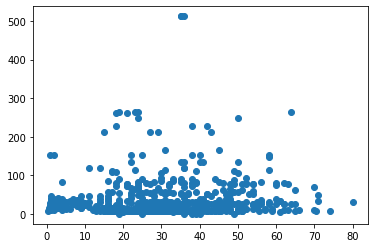

In [ ]:
plt.scatter(df_titanic['Age'],df_titanic['Fare'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


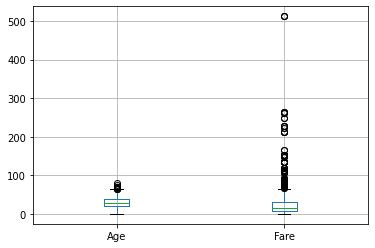

In [ ]:
df_titanic.boxplot(column=['Age','Fare'])

## 2) Métricas de Posição (média, mediana e moda) <a class="anchor" id="dois"></a>

**Média (mean, average):** Demonstra a concentração dos dados de uma distribuição. É como se fosse o ponto de equilíbrio da distribuição e pode ser calculada por:

!['média'](https://miro.medium.com/max/628/1*U9LeYbNWJt0YERVo4KU61w.png)

In [ ]:
media_idade = df_titanic['Age'].sum()/df_titanic['Age'].count() #Posso usar length também
media_idade

29.69911764705882

In [ ]:
df_titanic['Age'].mean()

29.69911764705882

**Moda:** Representa o(s) valores mais comuns dos dados:
* Unimodal: 1 único valor;
* Bimodal: 2 valores;
* Multimodal: Mais de 2 valores como os que mais aparecem;
* Amodal: Não existe moda.


In [ ]:
df_titanic['Age'].mode()

0    24.0
dtype: float64

**Mediana**: É o ponto médio, que divide os dados em 50% maiores e 50% maiores do que ele. É também conhecido como o 2°quartil (uma medida separatriz).
* Primeiro quartil (designado por Q1) = quartil inferior = é o valor aos 25% da amostra ordenada = 25º percentil;
* Segundo quartil (designado por Q2) = mediana = é o valor até ao qual se encontra 50% da amostra ordenada = 50º percentil, ou 5º decil;
* Terceiro quartil (designado por Q3) = quartil superior = valor a partir do qual se encontram 25% dos valores mais elevados = valor aos 75% da amostra ordenada = 75º percentil.

In [ ]:
df_titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## 3) Quartis e Interpretação por BoxPlot <a class="anchor" id="três"></a>

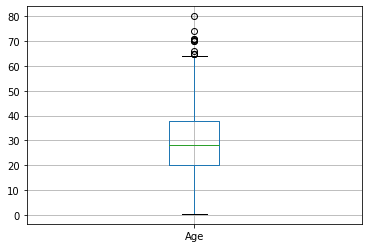

In [ ]:
df_titanic.boxplot(column=['Age'])

## 4) Identificação de Anomalias (Outliers) <a class="anchor" id="quatro"></a>

*Outlier* são dados diferentes dos outros pontos que podem causar problemas em procedimentos estatísticos (mudar uma média).

**Exemplo:** Mudar uma idade e ver a média.

* Solução 1: Ordenar os dados para encontrar outliers;
* Solução 2: Utilizar gráficos: dispersão, boxplot;
* Solução 3: Utilizar IQR para encontrar;
* Solução 4: Utilizar o Z-score.


teste de hipóteses:

H0: $X = max$

H1: $X>max$

## 5) Métricas de Dispersão (amplitude, variância, covariância e desvio padrão <a class="anchor" id="cinco"></a>

**Amplitude**: A diferença entre o maior e o menor valor de um conjunto de dados.

In [ ]:
#Amplitude:
df_titanic['Age'].max()-df_titanic['Age'].min()

79.58

**Amplitude Interquartil:** Diferença entre o 1° e o 3° interquartil.

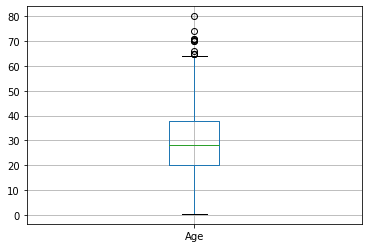

In [ ]:
df_titanic.boxplot(column=['Age'])

In [ ]:
#Encontrando o primeiro quartil
Q1 = df_titanic['Age'].quantile(0.25)
#Encontrando o terceiro quartil
Q3 = df_titanic['Age'].quantile(0.75)

In [ ]:
IQR = Q3-Q1
IQR

17.875

**Variância:** Mede o quanto os dados estão dispersos com relação à média. É calculada da seguinte forma:

!['Variância'](https://miro.medium.com/max/996/1*7BEyGiM3JHEEmU2XTB1zZA.png)

In [ ]:
list(map(lambda x: (x-2)**2,[1,2,3]))

[1, 0, 1]

In [ ]:
media = df_titanic['Age'].mean()
sum_erro = sum(list(map(lambda x: (x-media)**2,df_titanic['Age'].dropna())))

In [ ]:
sum_erro

150456.63594411768

In [ ]:
variancia = sum_erro/len(df_titanic['Age'].dropna())
variancia

210.7235797536662

**Desvio-padrão**: mais utilizado por estar na unidade dos dados. É a raiz quadrada da variância.

!['Desvio-padrão'](https://miro.medium.com/max/1152/1*qPMBPNKhZvuPIBN1BQLV7w.png)


In [ ]:
dvp = np.sqrt(variancia)
dvp

14.516321150817317

**Coeficiente de variação:** Variabilidade dos dados em relação à média.

**Desvio-padrão** é menor (CV<100%) ou maior (CV>100%) do que a média.

!['Coeficiente de Variação'](https://www.questoesestrategicas.com.br//imgs//?i=lAhgne6HtltF2uKrJPYUvB2i0W7KTGqTYsaFKn3c5BM)


In [ ]:
df_titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df_titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
CV1 = 14.526497/29.699118
CV1

0.48912216854386054

In [ ]:
CV2 = 49.693429/32.204208
CV2

1.543072538843371

**Covariância:** A covariância é uma medida estatística onde é possível comparar duas variáveis, permitindo entender como elas se relacionam entre si.

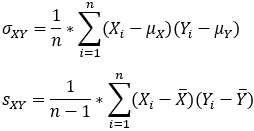

In [ ]:
df_titanic.cov()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,66231.000000,-0.626966,-7.561798,138.696504,-16.325843,-0.342697,161.883369
Survived,-0.626966,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-7.561798,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,138.696504,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-16.325843,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,-0.342697,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,161.883369,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


## 6) Correlação <a class="anchor" id="seis"></a>

A correlação indica a interdependência entre duas ou mais variáveis.

Em certos casos essa interdependência é clara:

* Massa corporal e altura;
* Consumo de combustível e distância percorrida;
* Número de anúncios e produtos vendidos;
* Tempo de estudo e desempenho na avaliação(nem sempre…rs).
* Mas em muitos casos essa relação não é aparente, e assim devemos recorrer a métodos mais confiáveis de detecção. 

Dentre os métodos mais comuns temos os índices de Pearson, Spearman e Kendall. Vamos falar um pouco sobre esses índices.

### Correlação de Pearson

Também chamado de “coeficiente de correlação produto-momento” ou simplesmente de “ρ de Pearson” mede o grau da correlação (e a direção dessa correlação — se positiva ou negativa) entre duas variáveis. Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1.

!['Pearson'](https://miro.medium.com/max/872/1*KWAowigAR0EqWMmSBwOsqg.png)

In [ ]:
df_titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Probabilidade

Qual a probabilidade de ter uma pessoa sorteada nessa população ser do sexo masculino?

In [ ]:
df_titanic[df_titanic['Sex']=='male'].count()/df_titanic['Sex'].count()

PassengerId    0.647587
Survived       0.647587
Pclass         0.647587
Name           0.647587
Sex            0.647587
Age            0.508418
SibSp          0.647587
Parch          0.647587
Ticket         0.647587
Fare           0.647587
Cabin          0.120090
Embarked       0.647587
dtype: float64

Qual a probabilidade de ter uma pessoa sorteada nessa população ser do sexo feminino?

Considerando que eu tiro uma amostra de 10 pessoas da população de tripulantes, qual a probabilidade de 7 ou mais serem mulheres?

Retire uma amostra aleatória da população, calcule a média dessa idade e conclua qual a probabilidade de encontrar uma pessoa com uma média menor ou igual à essa idade.

# Inferência

## Teorema Central do limite

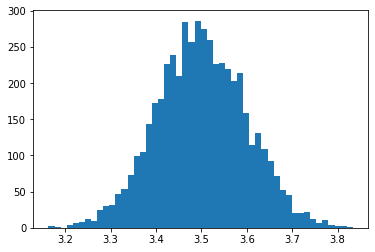

In [ ]:
n = 5000
s = []

for i in range(n):
  j=0
  for k in range(300):
    val = random.randint(1,6)
    j = j+val
  s.append(j/300)
plt.hist(s,bins=50)
plt.show()

## Estimação por intervalos de confiança

Use o conceito de intervalos de confiança para dizer se há diferença significativa no valor pago de tarifas para as pessoas do sexo masculino e do sexo feminino, com confiança de 95%.

a) Use a tabela t-Student.

b) Use a tabela normal padrão.

Use o conceito de intervalos de confiança para dizer se há diferença significativa na média de idades para as pessoas do sexo masculino e do sexo feminino, com confiança de 95%.

Use o conceito de intervalos de confiança para dizer se há diferença significativa na proporção de sobreviventes para as pessoas do sexo masculino e do sexo feminino, com confiança de 95%.

## Teste de hipóteses

Com base na nossa base de dados do Titanic tentaremos responder a seguintes pergunta “O gênero/sexo teve algum efeito na sobrevivência dos passageiros?”

Use o conceito de teste de hipóteses para dizer se há diferença significativa no valor pago de tarifas para as pessoas do sexo masculino e do sexo feminino, com confiança de 95%.